In [9]:
# Granger Causality Test
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.stats.diagnostic import unitroot_adf
from sklearn import preprocessing

In [10]:
path = ''

filename = 'data/output_populations_2-1000-s-l.csv'
filename2 = 'data/output_pops_E.csv'
excel_filename = 'Data_Recording_Temp.xlsx'
st = 400
ed = 1000

file = path+filename
df = (pd.read_csv(file, sep=",", header=0))[st:ed]

dfIt = df['iteration']
dfS_1 = df['1']
dfS_2 = df['2']

df = pd.DataFrame({'iteration': dfIt, 'species_1': dfS_1, 'species_2': dfS_2})

print(df.head(10))

iteration  species_1  species_2
400        401      55454      10023
401        402      55470      10166
402        403      55484      10313
403        404      55498      10446
404        405      55505      10585
405        406      55515      10736
406        407      55516      10887
407        408      55505      11021
408        409      55526      11140
409        410      55537      11270


In [24]:
# Check data
def adf_test(data):
    print('Dickey-Fuller Test:')
    df_Test = adfuller(data, autolag='AIC')

    df_Result = pd.Series(df_Test[0:4], index=['Test Statistics', 'p-Value', '#Lags used', 'Observ used'])
    for key, value in df_Test[4].items():
        df_Result['Critical Value (%s)' %key] = value
    print(df_Result)
    print('p-Value < 0.05 (5.0e-2): ', df_Test[1] < 0.05)
    print('Test Statistics < Critical Value (1%): ', df_Test[0] < df_Test[4]['1%'])
    if df_Test[1]<0.05 and df_Test[0]<df_Test[4]['1%']:
        print('The given series data is stable for Granger Test')
    else:
        print('The given series data is NOT stable for Granger Test')

adf_test(df['species_1'])

adf_test(df['species_2'])

Dickey-Fuller Test:
Test Statistics          -1.402255
p-Value                   0.581194
#Lags used               11.000000
Observ used             588.000000
Critical Value (1%)      -3.441520
Critical Value (5%)      -2.866468
Critical Value (10%)     -2.569394
dtype: float64
p-Value < 0.05 (5.0e-2):  False
Test Statistics < Critical Value (1%):  False
The given series data is NOT stable for Granger Test
Dickey-Fuller Test:
Test Statistics          -4.435241
p-Value                   0.000257
#Lags used               13.000000
Observ used             586.000000
Critical Value (1%)      -3.441558
Critical Value (5%)      -2.866485
Critical Value (10%)     -2.569403
dtype: float64
p-Value < 0.05 (5.0e-2):  True
Test Statistics < Critical Value (1%):  True
The given series data is stable for Granger Test


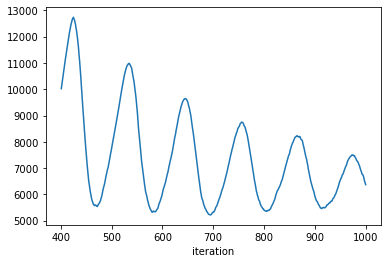

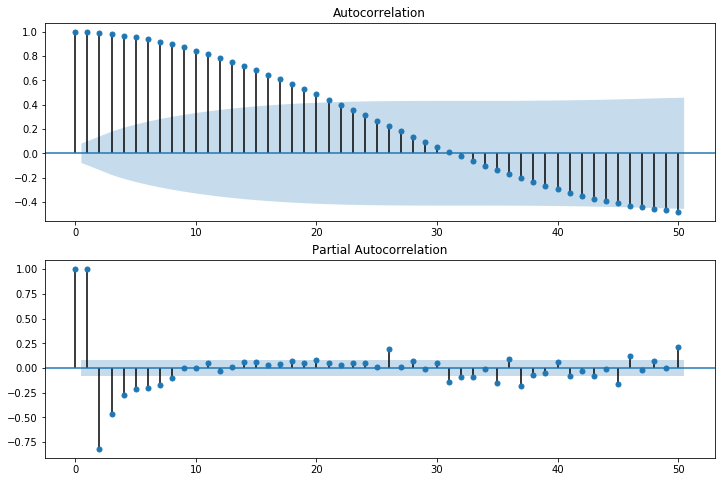

In [46]:
dta = pd.Series(df['species_2'])
dta.index = pd.Index(df['iteration'])
#dta.plot(figsize=(12,8))
dta.plot()

# fig = plt.figure()
# ax1= fig.add_subplot(111)
# diff1 = dta.diff(1)
# diff2 = diff1.diff(1)
# diff1.plot(ax=ax1)

#adf_test(diff1.tolist())

fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = plot_acf(dta,lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(dta,lags=50,ax=ax2)

In [47]:
arma_mod20 = ARMA(dta,(7,0)).fit()
print(arma_mod20.aic,arma_mod20.bic,arma_mod20.hqic)
arma_mod30 = ARMA(dta,(0,1)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)
arma_mod40 = ARMA(dta,(7,1)).fit()
print(arma_mod40.aic,arma_mod40.bic,arma_mod40.hqic)
arma_mod50 = ARMA(dta,(8,0)).fit()
print(arma_mod50.aic,arma_mod50.bic,arma_mod50.hqic)

C:\Program Files\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Program Files\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Program Files\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
5432.931789582723 5472.5041564796675 5448.336515992571
9893.123692614154 9906.314481579802 9898.258601417436
C:\Progr

In [4]:
def write_to_excel(value, name):
    df_excel = pd.DataFrame(value)
    #print("To insert:\n", df_excel)
    #df_excel = df_excel.append(ds_excel, ignore_index=True)
    df_excel.to_excel(path+excel_filename, sheet_name=name, index=False)
    

In [5]:
def format_result(data):
    output_1 = []
    output_2 = []
    output_3 = []
    output_4 = []
    output_5 = []
    output_6 = []
    output_7 = []
    output_8 = []

    for i in range(5):
        output_1.append(data[i+1][0]['ssr_ftest'][0])
        output_2.append(data[i+1][0]['ssr_ftest'][1])
        output_3.append(data[i+1][0]['ssr_chi2test'][0])
        output_4.append(data[i+1][0]['ssr_chi2test'][1])
        output_5.append(data[i+1][0]['lrtest'][0])
        output_6.append(data[i+1][0]['lrtest'][1])
        output_7.append(data[i+1][0]['params_ftest'][0])
        output_8.append(data[i+1][0]['params_ftest'][1])


    df_output = pd.DataFrame(
        {"SF_F": output_1,
         "SF_p": output_2,
         "SC_chi2": output_3,
         "SC_p": output_4,
         "LR_chi2": output_5,
         "LR_p": output_6,
         "PF_F": output_7,
         "PF_p": output_8}
    )

    print(df_output)

    return df_output



1 eats 2?
        SF_F          SF_p     SC_chi2          SC_p     LR_chi2  \
0  28.073635  1.942846e-07   28.286314  1.046332e-07   27.328665   
1  13.923199  1.438288e-06   28.200678  7.521434e-07   27.246405   
2   7.001978  1.346020e-04   21.382962  8.765341e-05   20.826981   
3  52.136963  4.102323e-35  213.397803  4.937045e-45  170.698592   
4  40.549879  1.855091e-33  208.557322  4.190270e-43  167.462325   

           LR_p       PF_F          PF_p  
0  1.716479e-07  28.073635  1.942846e-07  
1  1.212044e-06  13.923199  1.438288e-06  
2  1.143551e-04   7.001978  1.346020e-04  
3  7.405093e-36  52.136963  4.102323e-35  
4  2.537870e-34  40.549879  1.855091e-33  


2 eats 1?
         SF_F           SF_p      SC_chi2           SC_p     LR_chi2  \
0    5.431213   2.028144e-02     5.472359   1.931954e-02    5.435171   
1  102.970797   1.101760e-36   208.561716   5.145158e-46  167.699082   
2   27.362085   4.436455e-16    83.559598   5.288217e-18   75.832945   
3  255.159344  4.3576

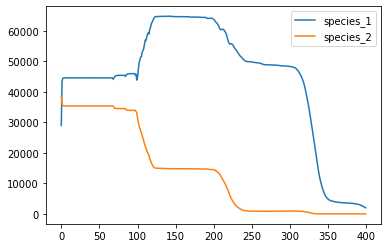

In [14]:

maxlag = 5
def GCT(dataframe):
    print('\n\n1 eats 2?')
    result_1 = grangercausalitytests(dataframe[['species_1', 'species_2']], maxlag=maxlag, verbose=False)

    df_result_1 = format_result(result_1)

    #write_to_excel(df_result_1, "1 causes 2")

    print('\n\n2 eats 1?')
    result_2 = grangercausalitytests(dataframe[['species_2', 'species_1']], maxlag=maxlag, verbose=False)
    df_result_2 = format_result(result_2)

    write_to_excel(df_result_2, "2 causes 1")

    dataframe[['species_1', 'species_2']].plot()

    # 'SSR' = Residual Sum of Squares
    # 'SSR based F test' and 'parameter F test' turn out to be the same and is what R reports (and is verified against R, IIRC).
    # statsmodels.tsa.stattools.grangercausalitytests uses the degrees of freedom definition for a single ordinary least square (OLS) estimate. 
    # works only for bivariate case.
    # 'SSR based F test' compares SSR between restricted and unrestricted model
    # 'parameter F test' builds a restriction matrix and uses the f_test of the unrestricted results instance.
    # 'parameter F test', 'SSR based F test' are based on F distribution
    # 'ssr based chi2 test', 'likelihood ratio test' are based on chi-square distribution

GCT(df)

species_1  species_2
0   1.257092   1.444676
1   1.264621   1.523463
2   1.271209   1.604455
3   1.277797   1.677732
4   1.281091   1.754316
5   1.285797   1.837511
6   1.286268   1.920706
7   1.281091   1.994534
8   1.290974   2.060099
9   1.296150   2.131723


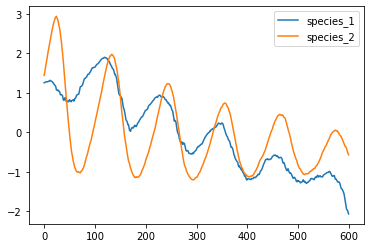

In [34]:
# Standardisation

# Create the Scaler object
scaler = preprocessing.StandardScaler()
test = df.drop(columns=['iteration'])
scaled_df = scaler.fit_transform(test)
scaled_df = pd.DataFrame(scaled_df, columns=test.columns)

print(scaled_df.head(10))
scaled_df[['species_1','species_2']].plot()

species_1  species_2
400  10.923309   9.212638
401  10.923598   9.226804
402  10.923850   9.241161
403  10.924102   9.253974
404  10.924228   9.267193
405  10.924409   9.281358
406  10.924427   9.295325
407  10.924228   9.307558
408  10.924607   9.318298
409  10.924805   9.329900


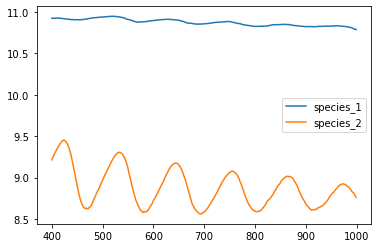

In [35]:
# Log-Transformation

logged_df = np.log(test)
print(logged_df.head(10))
logged_df[['species_1','species_2']].plot()

In [9]:
# Check data

print('Dickey-Fuller Test:')
df_Test = adfuller(scaled_df['species_1'], autolag='AIC')
df_Result = pd.Series(df_Test[0:4], index=['Test Statistics', 'p-Value', '#Lags used', 'Observ used'])
for key, value in df_Test[4].items():
    df_Result['Critical Value (%s)' %key] = value
print(df_Result)
print('p-Value < 0.05 (5.0e-2): ', df_Test[1] < 0.05)
print('Test Statistics < Critical Value (1%): ', df_Test[0] < df_Test[4]['1%'])
if df_Test[1]<0.05 and df_Test[0]<df_Test[4]['1%']:
    print('The given series data is stable for Granger Test')
else:
    print('The given series data is NOT stable for Granger Test')

Dickey-Fuller Test:
Test Statistics          -0.757430
p-Value                   0.831308
#Lags used               16.000000
Observ used             383.000000
Critical Value (1%)      -3.447540
Critical Value (5%)      -2.869116
Critical Value (10%)     -2.570806
dtype: float64
p-Value < 0.05 (5.0e-2):  False
Test Statistics < Critical Value (1%):  False
The given series data is NOT stable for Granger Test




1 eats 2?
        SF_F          SF_p     SC_chi2          SC_p     LR_chi2  \
0  28.073635  1.942846e-07   28.286314  1.046332e-07   27.328665   
1  13.923199  1.438288e-06   28.200678  7.521434e-07   27.246405   
2   7.001978  1.346020e-04   21.382962  8.765341e-05   20.826981   
3  52.136963  4.102323e-35  213.397803  4.937045e-45  170.698592   
4  40.549879  1.855091e-33  208.557322  4.190270e-43  167.462325   

           LR_p       PF_F          PF_p  
0  1.716479e-07  28.073635  1.942846e-07  
1  1.212044e-06  13.923199  1.438288e-06  
2  1.143551e-04   7.001978  1.346020e-04  
3  7.405093e-36  52.136963  4.102323e-35  
4  2.537870e-34  40.549879  1.855091e-33  


2 eats 1?
         SF_F           SF_p      SC_chi2           SC_p     LR_chi2  \
0    5.431213   2.028144e-02     5.472359   1.931954e-02    5.435171   
1  102.970797   1.101760e-36   208.561716   5.145158e-46  167.699082   
2   27.362085   4.436455e-16    83.559598   5.288217e-18   75.832945   
3  255.159344  4.3576

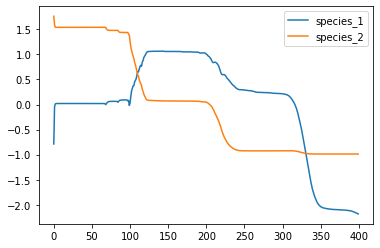

In [10]:
GCT(scaled_df)

species_1  species_2
0   -0.786684   1.760927
10   0.020365   1.539308
20   0.020365   1.539523
30   0.020365   1.539880
40   0.020365   1.540094
50   0.020365   1.540237
60   0.020365   1.540309
70   0.038464   1.491997
80   0.063440   1.478704
90   0.091364   1.437397


1 eats 2?
        SF_F      SF_p    SC_chi2      SC_p    LR_chi2      LR_p       PF_F  \
0  11.203992  0.001921  12.137658  0.000494  10.567421  0.001151  11.203992   
1   0.964286  0.391738   2.220781  0.329430   2.158310  0.339883   0.964286   
2   1.578569  0.215116   5.840704  0.119623   5.423119  0.143310   1.578569   
3   1.202635  0.332502   6.414054  0.170287   5.902590  0.206542   1.202635   
4   1.204456  0.337022   8.782492  0.118061   7.836008  0.165508   1.204456   

       PF_p  
0  0.001921  
1  0.391738  
2  0.215116  
3  0.332502  
4  0.337022  


2 eats 1?
       SF_F      SF_p   SC_chi2      SC_p   LR_chi2      LR_p      PF_F  \
0  0.394276  0.534023  0.427133  0.513399  0.424811  0.514546  0.394276

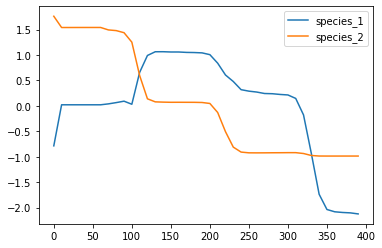

In [11]:
df_10 = scaled_df.filter(items=[i for i in range(ed-st) if i%10==0], axis=0)
#df_10.reset_index(inplace=True)
print(df_10.head(10))
GCT(df_10)

In [12]:
df_50 = scaled_df.filter(items=[i for i in range(ed-st) if i%50==0], axis=0)
#df_50.reset_index(inplace=True)
print(df_50.head(10))
GCT(df_50)

species_1  species_2
0    -0.786684   1.760927
50    0.020365   1.540237
100   0.031017   1.251583
150   1.058198   0.069523
200   1.005816   0.046511
250   0.288485  -0.923865
300   0.213815  -0.920506
350  -2.037721  -0.987256


1 eats 2?


ValueError: Insufficient observations. Maximum allowable lag is 1